# Assignment 1 - Julia_Exercises_Section_3.2

### Julia Exercise 3.2.1 – Plots, PDF, CDF, moments


In [73]:
import Pkg 
Pkg.add("Distributions")
using IJulia
using FFTW
using Distributions
using PyPlot;
#pyplot()

  Resolving package versions...
   Updating `C:\Users\NTLNKO007\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\NTLNKO007\.julia\environments\v1.4\Manifest.toml`
 [no changes]


a) Write Julia code to plot a Gaussian PDF with a specified mean µ and standard
deviation σ. You can choose values and experiment.


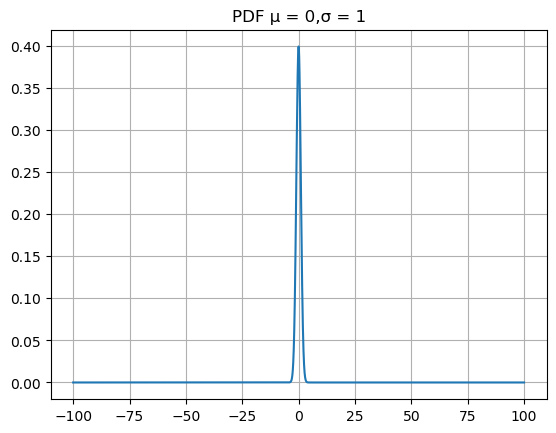

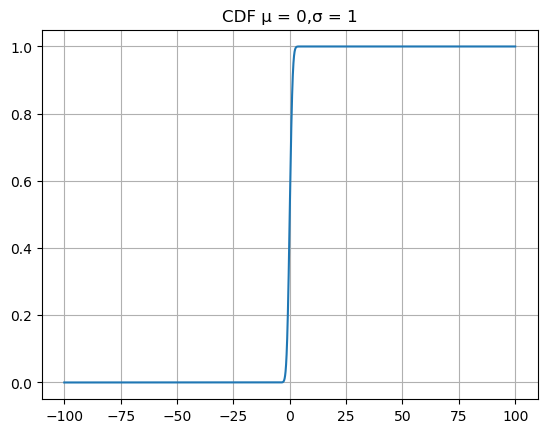

In [27]:
function p_x(x, µ, σ)
    A = 1/(sqrt(2π)*σ)
    B = -1/(2 *σ^2)
    C = (-µ .+ x )^2
    y = A .* exp.(B * C)
    return y
end

µ = 0
σ = 1
x1 = -100
x2 = 100
Δx = 0.001
x= x1:Δx:x2 # Specify x1<<µ-σ,x2>>µ-σ and small Δx<<σ

#PDF = myfunction(x) # put Gaussian formula here
PDF = p_x.(x,µ,σ)
CDF = cumsum(PDF)*Δx # cumulatively integrate

figure()
plot(x,PDF)
grid("on")
title("PDF µ = $(µ),σ = $(σ)")
figure()
plot(x,CDF) # Inspect plots.
grid("on")
title("CDF µ = $(µ),σ = $(σ)");

b) Using numerical integration (use: sum(...)*Δx) over a suitably long interval, and
with a fine enough sample spacing Δx, calculate the mean and standard deviation from
these formulas: 

In [28]:
µ=0
σ=1

PDFx = PDF .* x
#mean
Ex = sum(PDFx)*Δx
println(Ex)

# standardd deviation
VAR = (sum(((x.- Ex).^2).*PDF)) * Δx
stdp = sqrt(VAR)
println(stdp)

0.0
1.0


c) Do the results agree with you known values?

 Yes, the mean is zero and standard deviation is 0.5

## Julia Exercise 3.2.2 – Transformation

a) Write Julia code to generate N Gaussian random numbers for X~N(0,1),
using function randn(N).
Plot some of the numbers and create a histogram. Choose N large enough
for a smooth looking histogram.

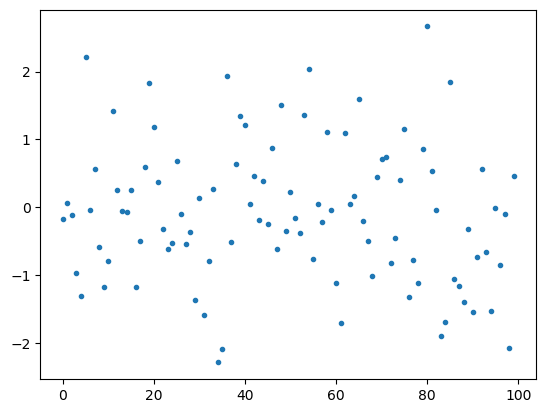

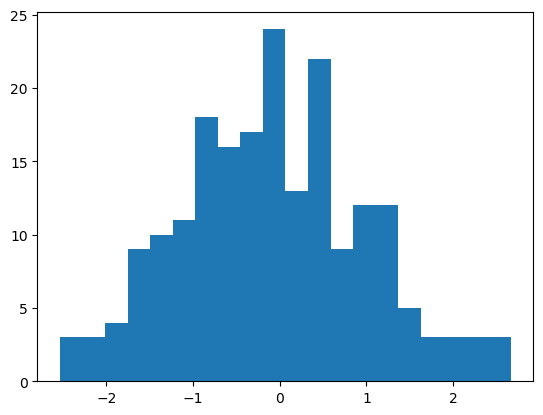

In [11]:
X = randn(200)
figure();
plot(X[1:100],".");

figure(); 
nbins = 20; hist(X,nbins);


b) Calculate Y via: a=2; b=1; Y = a*X .+ b
Plot some of the numbers and create a histogram.

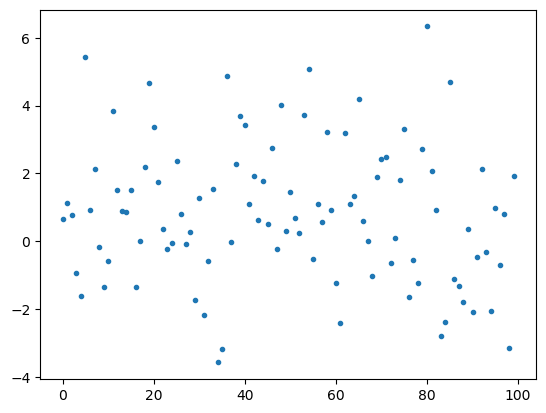

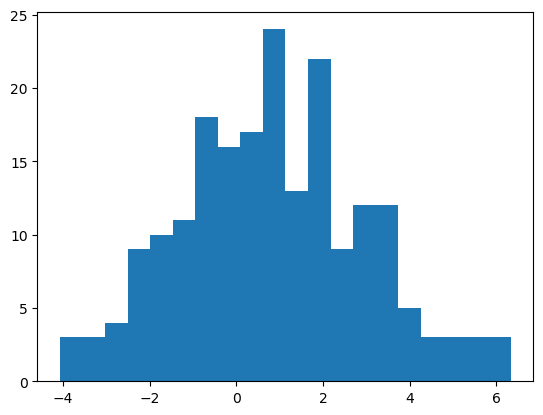

In [29]:
a = 2;
b = 1;
Y = a .*X .+ b

figure(); 
plot(Y[1:100],"."); nbins = 20;

figure() ;
hist(Y,nbins);

## Julia Exercise 3.2.3 - Full wave rectifier with noise input

a) Write Julia code to simulate the output of a full wave rectifier for the
case where the input X has a Gaussian distribution, with zero mean and
unit variance i.e. X~N(0,1). The output is Y = |X|.


In [68]:
σ = 1
µ = 0.0;
x1 = -10
Δx =0.01
x2 = 10
e = 2.718;
x = x1:Δx:x2


x_abs = abs.(x)

NormalFunc = Normal(µ,σ);
X = rand(NormalFunc, 20000);
Y = abs.(X);

PDF1  = p_x.(x,µ,σ)

y = p_x.(x_abs,µ,σ);

b) Produce plots of the array of input samples and the corresponding
output samples.


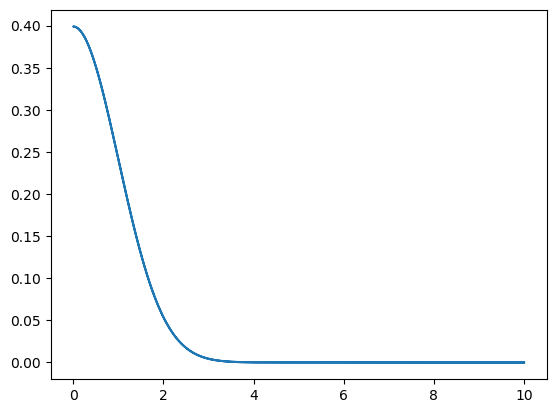

In [69]:
#y = abs.(sin.(2π*PDF))
figure()
plot(x_abs,y);

c) Plot histograms of input an output. You could try 20-30 bins, and
enough samples so that the histogram shape is visually smooth.

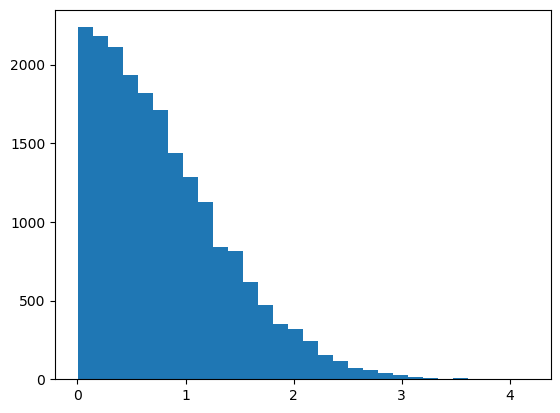

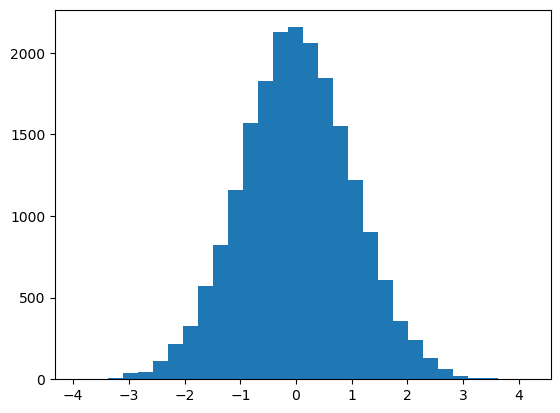

In [70]:
figure()
hist(Y,30)
figure()
hist(X,30);

d) Calculate the mean and standard deviation of the samples at the input
and output. Do the numbers agree with theory (see example in notes)?

In [78]:
println(mean(y))
println(std(y))

0.04997501249375313
0.10773109562241652


### Julia Exercise 3.2.4 – Creating Gaussian Variates

The Box-Muller transform creates Gaussian distributed random numbers (Z0,Z1) from pairs of
uniformly generated random numbers (U1,U2): 

a) Use the x=rand(N) function to generate N random numbers ~U(0,1).
Plot some numbers: plot(x[1:100],".")

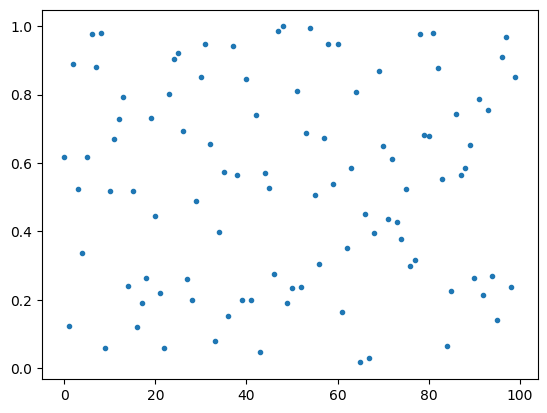

In [72]:
x = rand(100)
figure()
plot(x[1:100],".");

b) Plot a histogram [library PyPlot has a hist(x, nbins) function; Plots function is histogram()]

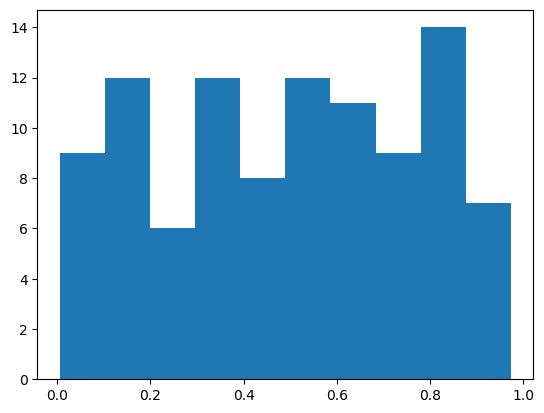

In [57]:
figure()
hist(x,10);

c) Calculate the mean and standard deviation [using Statistics library with mean(x), std(x)
functions]. Make N large enough so that the results are stable to 3 significant figures.

In [58]:
println(mean(x))
println(std(x));

0.4979112721594347
0.2798651061924438


d) Apply the Box-Muller transform to convert a pair of numbers U1 and U2 to Gaussian distributed
random numbers labelled Z0 and Z1.
(In Julia, create arrays via u1=rand(N) u2=rand(N) and then apply above formulas z0=...z1=…).
Inspect the numbers: plot(z[1:100],".")

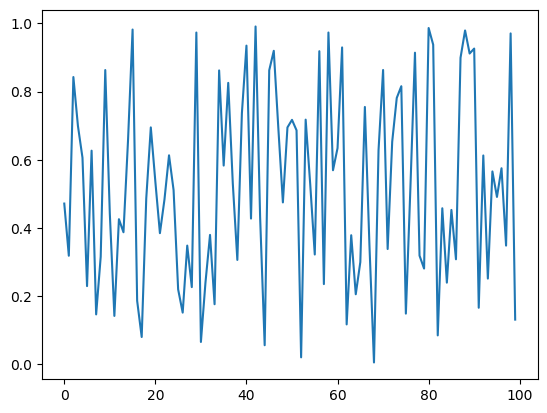

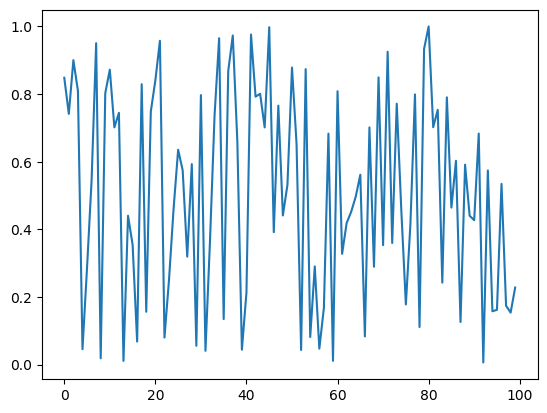

In [59]:
U1 = rand(100)
U2 = rand(100)

figure()
plot(U1[1:100])

figure()
plot(U2[1:100]);

e) Display histograms of z0 and z1.

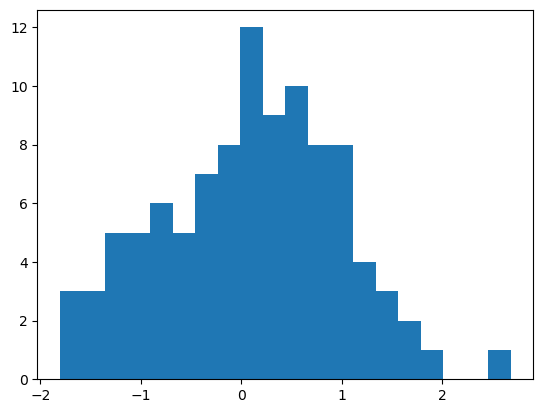

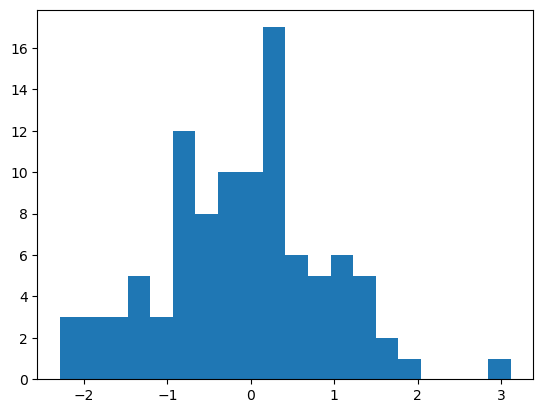

In [74]:
Z0 = sqrt.(((-2 ) .* log.(ℯ,U1))) .* cos.(2π * U2)
Z1 = sqrt.(((-2 ) .* log.(ℯ,U1))) .* sin.(2π * U2)

figure()
hist(Z0,20)

figure()
hist(Z1,20);

f) Calculate the mean and standard deviation.

In [76]:
println(mean(Z0))
println(std(Z0));

0.09106546339852022
0.8991590671383457


g) Compare to a histogram of random numbers created using the randn() function.
Note: Z0 and Z1 should be independent RVs and therefore uncorrelated. One can check this by
calculating the correlation coefficient between Z0 and Z1.

In [77]:
println(mean(Z1))
println(std(Z1));

-0.10287136716508365
0.9848632041328218


### Julia Exercise 3.2.5 – Distributions package

The Distributions package provides random number generators, both single variate and
multivariate. https://juliastats.org/Distributions.jl/stable
It also has a distribution fitting function (uses mostly “Method of Maximim Likelihood”) and
other functions.

a) Use the Distributions package to generate some Gaussian random numbers with a specified
mean and standard deviation. See next slide for code. Plot a histogram to inspect the data.

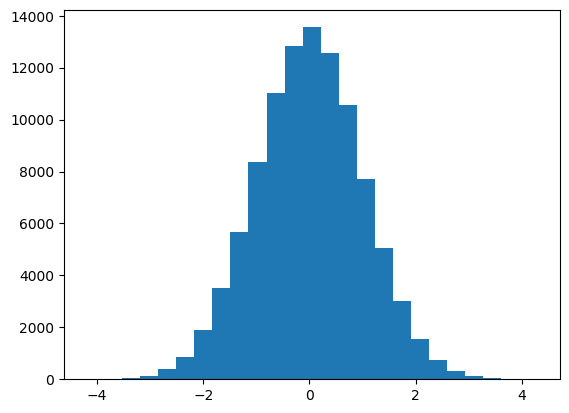

mean(xNormal) = -0.001
std(xNormal) = 0.999


In [62]:
using Random # if you want to set the seed
using Statistics # basic statistics functions
using Distributions # import the library

# Specify distribution type “d” with parameters
μ = 0; σ=1;
d = Normal(μ,σ)

# Random.seed!(123) # set seed if desired.
n=100000 # number of samples
x = rand(d,n) # creates array of samples of distribution type “d”


Average = mean(x) # calculate statistics
Standard_deviation = std(x)
figure()
hist(x,25)
Average = round(Average, digits = 3)
println("mean(xNormal) = ",Average)
Standard_deviation  = round(Standard_deviation, digits = 3)
println("std(xNormal) = ",Standard_deviation);

b) Use the “distribution fitting” function to fit a parameterized curve to the data, returning the best fit parameters. Compare using a small number of samples, say 10, to a larger number 1000.

In [63]:
""" data = rand(d,n) # As per part a).
D = Normal # Type of distribution to fit
d = fit(D, data) # See documentation for more details
# The outputs are two estimated parameters: μ and σ
println("Result: ",d) """;

In [64]:
first_data = rand(d,10000)
D = Normal # Type of distribution to fit
first_d = fit(D, first_data) # See documentation for more details
# The outputs are two estimated parameters: μ and σ
println("Result: ",first_d)

second_data = rand(d,10)
D = Normal # Type of distribution to fit
second_d = fit(D, second_data) # See documentation for more details
# The outputs are two estimated parameters: μ and σ
println("Result: ",second_d);

Result: Normal{Float64}(μ=-0.005103152038019932, σ=1.0004118776167354)
Result: Normal{Float64}(μ=-0.8093550919524256, σ=0.7141007610381126)


c) Repeat (a) and (b) for the case of a Rayleigh distribution. D = "Rayleigh". There
is only one parameter: σ.
(Manual: Univariate Distributions → Continuous Distributions)

In [65]:
""" # Julia code to generate random numbers of a specified type
using Random # if you want to set the seed
using Statistics # basic statistics functions
using Distributions # import the library
# Specify distribution type “d” with parameters
μ = 0; σ=1;
d = Normal(μ,σ)
# Random.seed!(123) # set seed if desired.
n=100000 # number of samples
x = rand(d,n) # creates array of samples of distribution type “d”
Average = mean(x) # calculate statistics
Standard_deviation = std(x)
println("Calculated mean(x) $(round(mean(x); sigdigits=3)) std(x) $(round(std(x); sigdigits=3))") """;

mean(xRayl) = 1.255
std(xRayl) = 0.659
Result: 

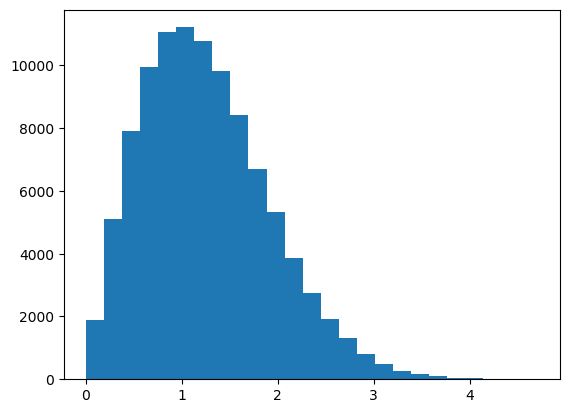

Rayleigh{Float64}(σ=0.9992893096939803)
Result: Rayleigh{Float64}(σ=0.9229952034863179)


In [66]:
μ = 0; σ=1;
d = Rayleigh(σ)

Random.seed!(123) # set seed if desired.
n=100000 # number of samples
x = rand(d,n) # creates array of samples of distribution type “d”
Average = mean(x) # calculate statistics
Standard_deviation = std(x)
figure()
hist(x,25)
Average = round(Average, digits = 3)
println("mean(xRayl) = ",Average)
Standard_deviation  = round(Standard_deviation, digits = 3)
println("std(xRayl) = ",Standard_deviation)

first_data = rand(d,10000)
D = Rayleigh # Type of distribution to fit
first_d = fit(D, first_data) # See documentation for more details
# The outputs are two estimated parameters: μ and σ
println("Result: ",first_d)
####
second_data = rand(d,10)
D = Rayleigh # Type of distribution to fit
second_d = fit(D, second_data) # See documentation for more details
# The outputs are two estimated parameters: μ and σ
println("Result: ",second_d)